In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tensorflow as tf
#import tensorflow_hub as hub

from tensorflow import keras
import time

import PIL.Image as Image
import matplotlib.pylab as plt


In [2]:
#load model
# It can be used to reconstruct the model identically.
model = keras.models.load_model("/home/arnold/raindrop-detection-cnn/models/custom_cloud_classification")

In [3]:
batch_size = 32
img_height = 720
img_width = 1280
class_names = ['clear', 'few', 'night', 'overcast', 'rain', 'scattered', 'snow']
new_img_path = '/home/mesonet/cam_photos/2018/12/20/VOOR/20181220T175030_VOOR.jpg'
#new_img_path = '/home/arnold/raindrop-detection-cnn/mesonet/20161013T164513_YORK.jpg_sliding_window.jpg'

img = keras.preprocessing.image.load_img(
    new_img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array.shape)
print(img_array)
predictions = model.predict(img_array)
print(predictions.shape)
score = tf.nn.softmax(predictions[0])
print(np.argmax(score))
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
# Image.open(new_img_path)

(1, 720, 1280, 3)
tf.Tensor(
[[[[209. 226. 242.]
   [209. 226. 242.]
   [209. 226. 242.]
   ...
   [141. 167. 216.]
   [136. 162. 211.]
   [133. 159. 208.]]

  [[209. 226. 242.]
   [209. 226. 242.]
   [209. 226. 242.]
   ...
   [146. 172. 221.]
   [142. 168. 217.]
   [139. 165. 214.]]

  [[209. 226. 242.]
   [209. 226. 242.]
   [209. 226. 242.]
   ...
   [151. 177. 226.]
   [148. 174. 223.]
   [146. 172. 221.]]

  ...

  [[ 55.  49.  33.]
   [ 92.  86.  70.]
   [105.  99.  83.]
   ...
   [ 66.  59.  41.]
   [ 73.  64.  47.]
   [ 75.  66.  49.]]

  [[ 43.  37.  21.]
   [ 66.  60.  44.]
   [ 67.  61.  45.]
   ...
   [ 74.  67.  51.]
   [ 83.  76.  60.]
   [ 76.  69.  53.]]

  [[ 64.  58.  42.]
   [ 71.  65.  49.]
   [ 52.  46.  30.]
   ...
   [ 78.  71.  55.]
   [102.  95.  79.]
   [ 96.  89.  73.]]]], shape=(1, 720, 1280, 3), dtype=float32)
(1, 7)
5
This image most likely belongs to scattered with a 99.94 percent confidence.


In [4]:
#test image
cloud = Image.open(new_img_path)
# cloud

In [5]:
#Add a batch dimension, and pass the image to the model.

cloud = np.array(cloud)/255.0
cloud = cloud[np.newaxis, ...]
print(cloud.shape)
print(cloud)
result = model.predict(cloud)
# result = model.predict(cloud[np.newaxis, ...])
print(result.shape)

(1, 720, 1280, 3)
[[[[0.81960784 0.88627451 0.94901961]
   [0.81960784 0.88627451 0.94901961]
   [0.81960784 0.88627451 0.94901961]
   ...
   [0.55294118 0.65490196 0.84705882]
   [0.53333333 0.63529412 0.82745098]
   [0.52156863 0.62352941 0.81568627]]

  [[0.81960784 0.88627451 0.94901961]
   [0.81960784 0.88627451 0.94901961]
   [0.81960784 0.88627451 0.94901961]
   ...
   [0.57254902 0.6745098  0.86666667]
   [0.55686275 0.65882353 0.85098039]
   [0.54509804 0.64705882 0.83921569]]

  [[0.81960784 0.88627451 0.94901961]
   [0.81960784 0.88627451 0.94901961]
   [0.81960784 0.88627451 0.94901961]
   ...
   [0.59215686 0.69411765 0.88627451]
   [0.58039216 0.68235294 0.8745098 ]
   [0.57254902 0.6745098  0.86666667]]

  ...

  [[0.21568627 0.19215686 0.12941176]
   [0.36078431 0.3372549  0.2745098 ]
   [0.41176471 0.38823529 0.3254902 ]
   ...
   [0.25882353 0.23137255 0.16078431]
   [0.28627451 0.25098039 0.18431373]
   [0.29411765 0.25882353 0.19215686]]

  [[0.16862745 0.14509804 0

In [6]:
#top class ID can be found with argmax:

predicted_class = np.argmax(result[0], axis=-1)
score = tf.nn.softmax(result[0])
print(predicted_class)
print(class_names[np.argmax(score)])

3
overcast


TypeError: Invalid shape (1, 720, 1280, 3) for image data

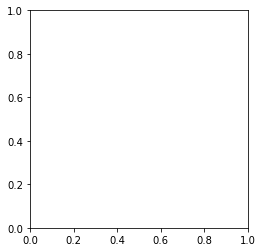

In [7]:
plt.imshow(cloud)
plt.axis('off')
predicted_class_name = class_names[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())